<a href="https://colab.research.google.com/github/francescopandolfo/TESI_LM32/blob/main/LR%20-%20variazione_relativa%20-%20dati%20riordinati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")
pathDrive = 'drive/MyDrive/UNICT/_TESI/dati/'

df = pd.read_csv(pathDrive + 'dati_interpolati_diff_1d-2d_8gg - riordinati.csv', sep=';')

df['edam_ecne_eplu_diff'] = df['edam_ecne_eplu_diff'].str.replace(',','.').astype(float)#
df['edam_ecor_emcn_diff'] = df['edam_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['edam_emsg_eplu_diff'] = df['edam_emsg_eplu_diff'].str.replace(',','.').astype(float)
df['edam_epdn_ecne_diff'] = df['edam_epdn_ecne_diff'].str.replace(',','.').astype(float)
df['edam_epdn_emcn_diff'] = df['edam_epdn_emcn_diff'].str.replace(',','.').astype(float)
df['eint_ecpn_emgl_diff'] = df['eint_ecpn_emgl_diff'].str.replace(',','.').astype(float)#
df['eint_esln_emgl_diff'] = df['eint_esln_emgl_diff'].str.replace(',','.').astype(float)
df['eint_esln_espc_diff'] = df['eint_esln_espc_diff'].str.replace(',','.').astype(float)
df['emeg_ecpn_emgl_diff'] = df['emeg_ecpn_emgl_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_ecri_diff'] = df['emfn_ecor_ecri_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_emcn_diff'] = df['emfn_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['emfn_emcn_epdn_diff'] = df['emfn_emcn_epdn_diff'].str.replace(',','.').astype(float)
df['epdn_ecne_ecpn_diff'] = df['epdn_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['epdn_eint_ecpn_diff'] = df['epdn_eint_ecpn_diff'].str.replace(',','.').astype(float)##
df['epdn_eint_espc_diff'] = df['epdn_eint_espc_diff'].str.replace(',','.').astype(float)
df['epdn_emfn_espc_diff'] = df['epdn_emfn_espc_diff'].str.replace(',','.').astype(float)
df['eplu_ecne_ecpn_diff'] = df['eplu_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_ecpn_diff'] = df['eplu_emeg_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_emal_diff'] = df['eplu_emeg_emal_diff'].str.replace(',','.').astype(float)
df['eplu_emsg_emal_diff'] = df['eplu_emsg_emal_diff'].str.replace(',','.').astype(float)


df_train = df[:126]
'''
df_val = df[126:170]
df_test = df[170:]
'''
df_test = df[126:]

y_train = df_train['evento'].astype(int).values
#y_val = df_val['evento'].astype(int).values
y_test = df_test['evento'].astype(int).values
#_dftarget = df['evento'].astype(int).values

In [3]:
def toDataFrame(df):
  format = '%d/%m/%Y'
  df['date'] = pd.to_datetime(df['day'], format=format)
  df = df.set_index('date')
  df = df.drop(columns=['day'])
  df = df.drop(columns=['evento'])

  for i in reversed(range(len(df.columns))):
    if df.dtypes[df.columns[i]] == 'object':
      df = df.drop(df.columns[i], axis=1)

  return df

df = toDataFrame(df)
df_train = toDataFrame(df_train)
#df_val = toDataFrame(df_val)
df_test = toDataFrame(df_test)

############## normalizzo tutto il dataframe
normalized_df = (df - df.mean()) / df.std()

############## normalizzo le tre parti del dataset in base alla varianza del training
df_train_mean = df_train.mean()
df_train_std = df_train.std()

normalized_df_train = (df_train - df_train_mean) / df_train_std
#normalized_df_val   = (df_val - df_train_mean) / df_train_std
normalized_df_test  = (df_test - df_train_mean) / df_train_std

In [ ]:
#normalized_df.info()

In [ ]:
#mm/dd/yyyy

#The 1986–2021 paroxysmal episodes at the summit craters of Mt. Etna: Insights into volcano dynamics and hazard
#Daniele Andronico, Andrea Cannata, Giuseppe Di Grazia, Ferruccio Ferrari - 2021

#LF Lava Fountain
LF = ['02/18/2021','02/19/2021','02/21/2021','02/24/2021',
           '03/02/2021','03/10/2021','03/15/2021','03/17/2021','03/24/2021','04/01/2021']

#LSLF Large-Scale Lava Fountain
LSLF = ['02/16/2021','02/23/2021','02/28/2021','03/04/2021','03/07/2021','03/12/2021','03/19/2021']

#TA Transitional Activity
TA = ['04/19/2020','12/13/2020','12/21/2020','12/22/2020','01/18/2021']

#Etna Output Rate during the Last Decade (2011–2022)
#Sonia Calvari and Giuseppe Nunnari
#EA Eruptive activity
EA = [
    '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019', '01/25/2019', '01/26/2019', '01/27/2019',
    '01/28/2019', '01/29/2019', '01/30/2019', '01/31/2019', '02/01/2019', '02/02/2019', '02/03/2019',
    '04/29/2019', '04/30/2019', '05/01/2019', '05/02/2019', '05/03/2019', '05/04/2019', '05/05/2019',
    '05/30/2019', '05/31/2019', '06/01/2019', '06/02/2019',
    '07/18/2019', '07/19/2019', '07/20/2019', '07/21/2019',
    '07/27/2019', '07/28/2019',
    '07/29/2019', '07/30/2019', '07/31/2019', '08/01/2019', '08/02/2019', '08/03/2019', '08/04/2019', #da analisi video: no esplosioni, solo attività locale
    #'08/19/2019', '08/20/2019', '08/21/2019', '08/22/2019', '08/23/2019', '08/24/2019', '08/25/2019',
    #'12/23/2019', '12/24/2019',
    '12/25/2019', '12/26/2019', '12/27/2019', '12/28/2019', '12/29/2019', '12/30/2019',
    #'04/29/2020', '05/06/2020', #solo deformazione?? no eventi vulcanici
    '12/07/2020', '12/08/2020','12/09/2020', '12/10/2020', '12/11/2020', '12/12/2020', '12/13/2020', '12/14/2020',
    '12/21/2020', '12/22/2020',
    '01/18/2021'

]


#Combined Seismic and Geodetic Analysis Before, During, and After the 2018 Mount Etna Eruption
#M. Mattia, V. Bruno, E. Montgomery‐Brown, D. Patanè, G. Barberi and M. Coltelli - 2020

#DI dike intrusion
DI = ['12/24/2018']

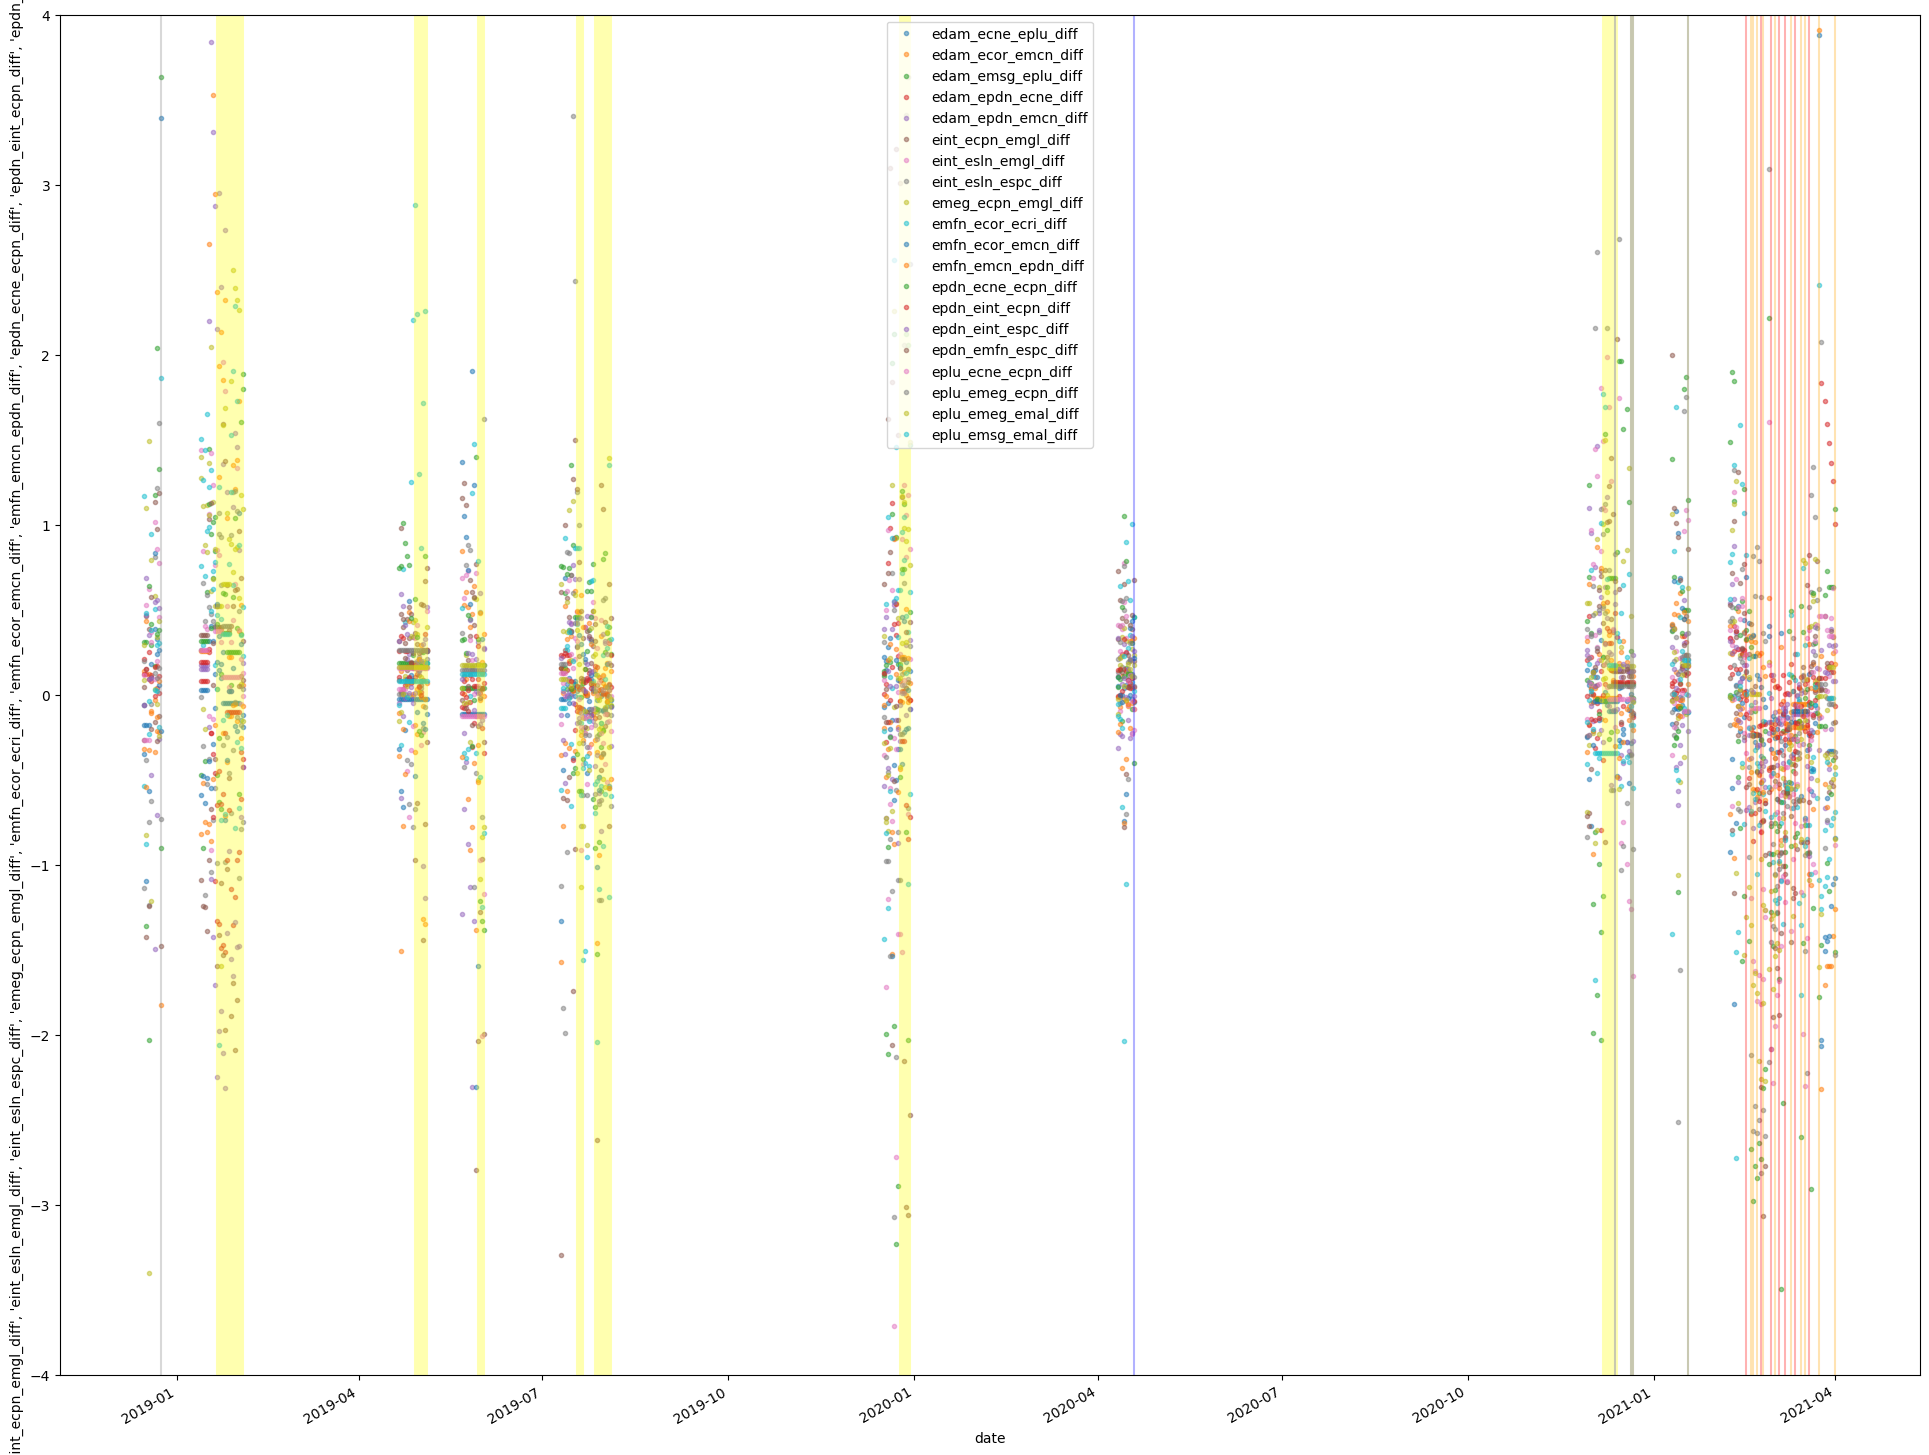

In [ ]:
normalized_df.plot(figsize=(24,20), marker = ".", linewidth=0, alpha = 0.5)
plt.xlabel('date')
plt.ylabel([
    'edam_ecne_eplu_diff',
    'edam_ecor_emcn_diff',
    'edam_emsg_eplu_diff',
    'edam_epdn_ecne_diff',
    'edam_epdn_emcn_diff',
    'eint_ecpn_emgl_diff',
    'eint_esln_emgl_diff',
    'eint_esln_espc_diff',
    'emeg_ecpn_emgl_diff',
    'emfn_ecor_ecri_diff',
    'emfn_ecor_emcn_diff',
    'emfn_emcn_epdn_diff',
    'epdn_ecne_ecpn_diff',
    'epdn_eint_ecpn_diff',
    'epdn_eint_espc_diff',
    'epdn_emfn_espc_diff',
    'eplu_ecne_ecpn_diff',
    'eplu_emeg_ecpn_diff',
    'eplu_emeg_emal_diff',
    'eplu_emsg_emal_diff'
])

plt.ylim(-4, 4)

events_alpha = 0.3

for f in LF:
    plt.axvline(x=f, color='orange', alpha = events_alpha)

for f in LSLF:
    plt.axvline(x=f, color='red', alpha = events_alpha)

for f in TA:
    plt.axvline(x=f, color='blue', alpha = events_alpha)

for f in EA:
    plt.axvline(x=f, color='yellow', alpha = events_alpha)

for f in DI:
    plt.axvline(x=f, color='gray', alpha = events_alpha)

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

#y = _dftarget
#split_at = 150

#max_f1_score = 0
#max_f1_score_who = ""
max_accuracy_train = 0
#max_accuracy_val = 0
max_accuracy_tot = 0
max_accuracy_test = 0

max_accuracy_train_who = ""
#max_accuracy_val_who = ""
max_accuracy_tot_who = ""
max_accuracy_test_who = ""
stato_iniziale = False
stato_iniziale_sequenza = [9,10,12,13,15,16,17,18,19]

def get_range(indice, loop_esterno):
  if stato_iniziale:
    return range(stato_iniziale_sequenza[indice], pca_feature_number)
  else:
    return range(loop_esterno + 1, pca_feature_number)

pca_feature_number = 20 #SOLO SE NON SI USA LA PCA

for i in get_range(0, -1):
  for j in get_range(1, i):
    for a in get_range(2, j):
      for b in get_range(3, a):
        for c in get_range(4, b):
          for d in get_range(5, c):
            for e in get_range(6, d):
              for f in get_range(7, e):
                for g in get_range(8, f):

                  stato_iniziale = False

                  who = "area " + str(i) + " - " + str(j) + " - " + str(a) + " - " + str(b) + " - " + str(c) + " - " + str(d) + " - " + str(e) + " - " + str(f) + " - " + str(g)

                  X_train = normalized_df_train.values[:, [i,j,a,b,c,d,e,f,g]]
                  #X_val   = normalized_df_val.values[:,   [i,j,a,b,c,d,e,f,g]]
                  X_test  = normalized_df_test.values[:,  [i,j,a,b,c,d,e,f,g]]

                  ################ LOGISTIC REGRESSION with CROSS VALIDATION
                  #lr = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced') #scoring per cambiare metrica
                  #lr.fit(X_train, y_train)
                  #acc_s = lr.score(X_train, y_train)*100
                  #acc_s_test = lr.score(X_test, y_test)*100
                  ###########################################################

                  ################ LOGISTIC REGRESSION
                  lr = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced') #scoring per cambiare metrica
                  lr.fit(X_train, y_train)

                  acc_train = lr.score(X_train,  y_train,  sample_weight=None)*100
                  #acc_val   = lr.score(X_val,    y_val,    sample_weight=None)*100
                  acc_test  = lr.score(X_test,   y_test,    sample_weight=None)*100

                  ################ RANDOM FOREST
                  '''
                  rf = RandomForestClassifier(max_depth=5, random_state=0)
                  rf.fit(X_train, y_train)
                  acc_train = rf.score(X_train,  y_train,  sample_weight=None)*100
                  acc_val   = rf.score(X_val,    y_val,    sample_weight=None)*100
                  acc_test  = rf.score(X_test,   y_test,    sample_weight=None)*100
                  #acc_s = np.mean(cross_val_score(clf, X_train, y_train, cv=5))*100
                  '''

                  acc_tot = acc_train + acc_test

                  if (max_accuracy_train < acc_train or max_accuracy_test < acc_test or max_accuracy_tot < acc_tot) or (acc_test >= 90):
                    print( who + ";" + "{:.1f}".format(acc_train) + ";" + "{:.1f}".format(acc_test) )

                    if max_accuracy_train < acc_train:
                      max_accuracy_train = acc_train
                      max_accuracy_train_who = who

                    if max_accuracy_test < acc_test:
                      max_accuracy_test = acc_test
                      max_accuracy_test_who = who

                    if max_accuracy_tot < acc_tot:
                      max_accuracy_tot = acc_tot


#print( max_f1_score_who )
#print( max_accuracy_score_who )
print( "---------------------> " + max_accuracy_train_who + " " + str(max_accuracy_train) )
print( "---------------------> " + max_accuracy_test_who + " " + str(max_accuracy_test) )
#print( conf_mat )

area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8;65.1;46.0
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 9;66.7;47.6
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 12;69.0;46.0
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 13;65.1;58.7
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 14;65.9;61.9
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 9 - 13;72.2;57.1
area 0 - 1 - 2 - 3 - 4 - 5 - 6 - 13 - 14;65.9;65.1
area 0 - 1 - 2 - 3 - 4 - 5 - 7 - 13 - 14;65.1;68.3
area 0 - 1 - 2 - 3 - 4 - 5 - 9 - 12 - 13;71.4;61.9
area 0 - 1 - 2 - 3 - 4 - 6 - 7 - 8 - 13;65.1;69.8
area 0 - 1 - 2 - 3 - 4 - 6 - 7 - 11 - 13;67.5;68.3
area 0 - 1 - 2 - 3 - 4 - 6 - 7 - 13 - 15;67.5;69.8
area 0 - 1 - 2 - 3 - 4 - 6 - 8 - 9 - 13;69.8;68.3
area 0 - 1 - 2 - 3 - 4 - 6 - 8 - 13 - 14;64.3;71.4
area 0 - 1 - 2 - 3 - 4 - 6 - 10 - 11 - 13;65.1;73.0
area 0 - 1 - 2 - 3 - 4 - 6 - 13 - 14 - 18;64.3;74.6
area 0 - 1 - 2 - 3 - 4 - 6 - 13 - 15 - 18;71.4;69.8
